Number of classes 2
393


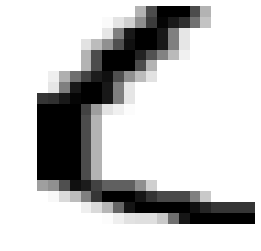

0
(393, 20, 20, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 18, 18, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)              0 

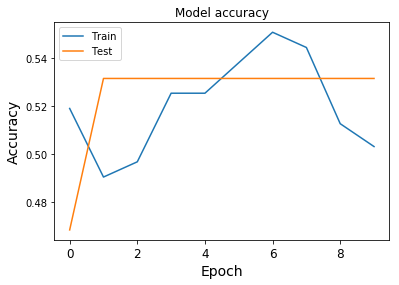

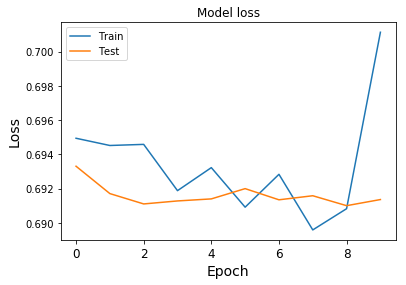

In [0]:
#To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Necessary import for the programm to run smoothly
import numpy as np
import os
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.layers import Conv2D, MaxPooling2D

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)

characters = []
labels = []

classes = ["Stelios", "Despo"]
num_classes = len(classes)

#Function that returns class name
def get_class_name(class_index):
    if class_index < 0 or class_index > 2:
        raise ValueError("Class Index must be > 0 and <= 2")
    return classes[class_index]

#Convert from one_hot to label function
def one_hot_to_label(one_hot):
     return np.argmax(one_hot)

print("Number of classes", num_classes)

#We load the character images of the 2 authors into the characters array
for character in os.listdir('steliosdata'):
    path = 'steliosdata/' + character
    img = imread(path)
    characters.append(img)
for character in os.listdir('writtenchars'):
    path = 'writtenchars/' + character
    img = imread(path)
    characters.append(img)

#We assign one-hot labels to the images
for i in range(len(characters)):
    if i < 208:
        labels.append("0")
    if i >= 208:
        labels.append("1")

#Display an image with its label
some_letter = characters[207]
plt.imshow(some_letter, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
print(labels[207])

#convert our characters and labels arrays to numpy arrays
characters = np.array(characters)
labels = np.array(labels)
samples, x, y = characters.shape
#reshaping characters array from 3 dimensions to 4.
characters = characters.reshape((samples,x,y,1))
#splitting the dataset to training and testing. 80% of data will be used for training and 20% will be used for testing
characters_train, characters_test, labels_train, labels_test = train_test_split(characters, labels, test_size=0.2, random_state=1, stratify=labels)
print(characters.shape)
labels_train = keras.utils.to_categorical(labels_train, num_classes)
labels_test = keras.utils.to_categorical(labels_test, num_classes)

#Normalize our dataset
characters_train = characters_train.astype('float32')
characters_test = characters_test.astype('float32')
characters_train /= 255
characters_test /= 255

#Select activation function
Activation('elu')

#Specify batch size and number of epochs
batch_size = 32
epochs = 10

#Defyning our model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='elu',
                 input_shape=(20,20,1)))
model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

#Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#Fit our dataset into the model
history = model.fit(characters_train, labels_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(characters_test, labels_test))
#Print Accurasy score and loss score
score = model.evaluate(characters_test, labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()